In [ ]:
import torch
# Mengimpor PyTorch untuk operasi tensor dan autograd

import torch.nn as nn
# Mengimpor modul neural network (layer, loss function)

import numpy as np
# Mengimpor NumPy untuk manipulasi array

from sklearn import datasets
# Mengimpor modul dataset dari scikit-learn

import matplotlib.pyplot as plt
# Mengimpor matplotlib untuk visualisasi data dan hasil model

epoch: 10, loss = 4409.9292
epoch: 20, loss = 3291.3950
epoch: 30, loss = 2481.5254
epoch: 40, loss = 1894.5454
epoch: 50, loss = 1468.7124
epoch: 60, loss = 1159.5172
epoch: 70, loss = 934.8317
epoch: 80, loss = 771.4374
epoch: 90, loss = 652.5342
epoch: 100, loss = 565.9540


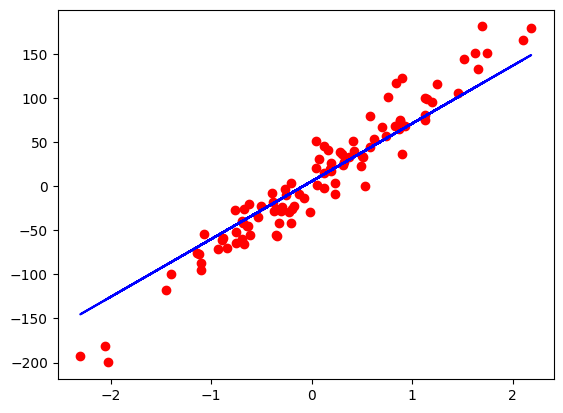

In [ ]:
X_numpy, y_numpy = datasets.make_regression(
    n_samples=100,
    n_features=1,
    noise=20,
    random_state=1
)
# Membuat dataset regresi sintetis
# 100 sampel, 1 fitur, ditambahkan noise agar data tidak linear sempurna

X = torch.from_numpy(X_numpy.astype(np.float32))
# Mengonversi data input dari NumPy ke tensor PyTorch
# Tipe float32 diperlukan oleh PyTorch

y = torch.from_numpy(y_numpy.astype(np.float32))
# Mengonversi target dari NumPy ke tensor PyTorch

y = y.view(y.shape[0], 1)
# Mengubah bentuk y menjadi (n_samples, 1)
# Agar sesuai dengan output model nn.Linear

n_samples, n_features = X.shape
# Mengambil jumlah sampel dan jumlah fitur
# Samples adalah BARIS, features adalah KOLOM
# Semua feature digabung menjadi kolom-kolom dalam satu matriks X

input_size = n_features
# Jumlah neuron input (sama dengan jumlah fitur)

output_size = 1
# Jumlah neuron output (1 nilai prediksi)

model = nn.Linear(input_size, output_size)
# Membuat model linear regression PyTorch
# y = wx + b

learning_rate = 0.01
# Learning rate untuk optimizer

criterion = nn.MSELoss()
# Mendefinisikan loss function Mean Squared Error

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Optimizer Stochastic Gradient Descent untuk update parameter model

num_epochs = 100
# Jumlah epoch training

for epoch in range(num_epochs):
  # Loop training

  y_predicted = model(X)
  # Forward pass: prediksi output dari model

  loss = criterion(y_predicted, y)
  # Menghitung loss antara prediksi dan target

  loss.backward()
  # Backpropagation: menghitung gradien parameter model

  optimizer.step()
  # Update bobot dan bias menggunakan gradien

  optimizer.zero_grad()
  # Mengosongkan gradien agar tidak terakumulasi

  if (epoch + 1) % 10 == 0:
    # Menampilkan loss setiap 10 epoch
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

predicted = model(X).detach().numpy()
# Mengambil hasil prediksi akhir
# detach() memutus dari computation graph
# numpy() mengonversi tensor ke array NumPy

plt.plot(X_numpy, y_numpy, 'ro')
# Menampilkan data asli sebagai titik merah

plt.plot(X_numpy, predicted, 'b')
# Menampilkan garis hasil regresi sebagai garis biru

plt.show()
# Menampilkan grafik

# RINGKASAN:
# Kode ini mengimplementasikan linear regression end-to-end menggunakan PyTorch:
# - Dataset regresi sintetis dibuat dengan scikit-learn
# - Data dikonversi ke tensor PyTorch
# - Model linear dibuat dengan nn.Linear
# - Training dilakukan dengan MSELoss dan SGD
# - Hasil training divisualisasikan dengan matplotlib
# Ini adalah contoh lengkap pipeline machine learning sederhana.